## Plotting results

In [1]:
import altair as alt
import pandas as pd
import seaborn as sns

C:\Users\cgodoy\AppData\Local\Continuum\anaconda2\lib\site-packages\dateutil\parser\_parser.py:1177: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif res.tzname and res.tzname in time.tzname:


In [18]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [19]:
preds = pd.read_csv('prediction.csv', header=0)
realdata = pd.read_csv('data/TOTAL.csv', header=0)

In [20]:
preds.head()


,price,date,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2.722773,2017-05-01 01:00:00,7350430,19512600,822,2823.0,101750,16584900,996100
1,3.063507,2017-05-01 02:00:00,6878140,19271400,825,2815.0,101000,16584900,1017200
2,3.102362,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100
3,3.102362,2017-12-31 19:00:00,14799900,28535100,304,2846.0,0,17432900,2570500
4,3.069327,2017-05-01 03:00:00,6335000,19283000,872,2809.0,101000,16584900,888100


In [21]:
realdata.head()

,date,price,wind,demand,photo,temp,thermo,hydro_disp,hydro_prod
0,2014-01-01 01:00:00,0.535,11052000,21136100,151,2791.0,0,16503000,1649700
1,2014-01-01 02:00:00,0.500,10774000,19911100,160,2791.0,0,16503000,1492600
2,2014-01-01 03:00:00,0.050,10669000,19060000,151,2792.0,0,16503000,1346200
3,2014-01-01 04:00:00,0.000,10595000,19080200,154,2793.0,0,16503000,1328300
4,2014-01-01 05:00:00,0.000,10242000,18719500,164,2794.0,0,16503000,1304600


In [22]:
realdata=realdata[['date','price']]
preds=preds[['date','price']]

In [23]:
#the data set is too long, so we will reduce it to one year.
preds =preds.sort_values('date').drop_duplicates(subset='date',keep='last')
realdata =realdata.sort_values('date').drop_duplicates(subset=['date', 'price'])

In [24]:
preds=preds.tail(2000)
realdata=realdata.tail(2000)

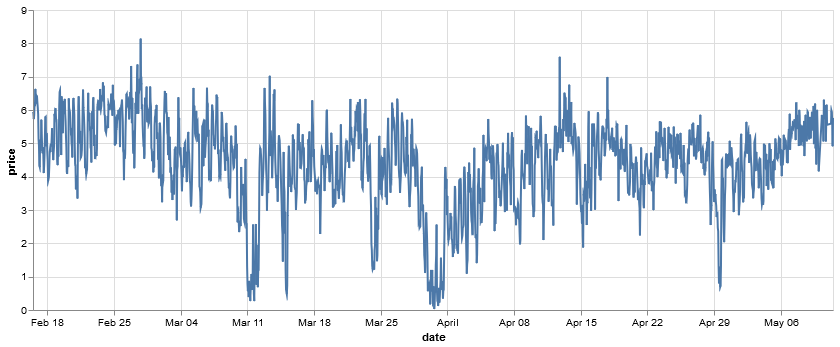

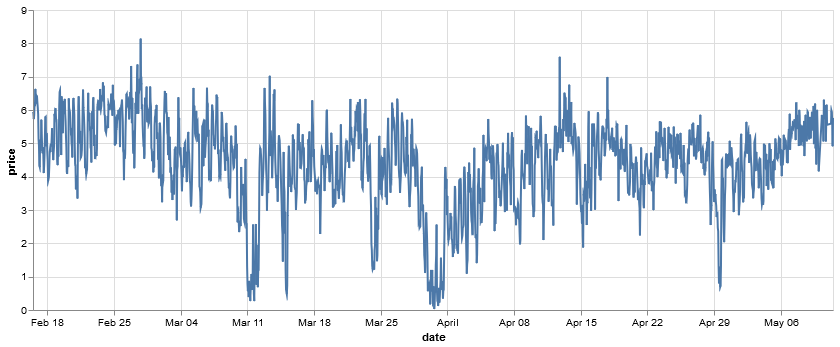

In [25]:
#Predictions plot
alt.Chart(preds).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

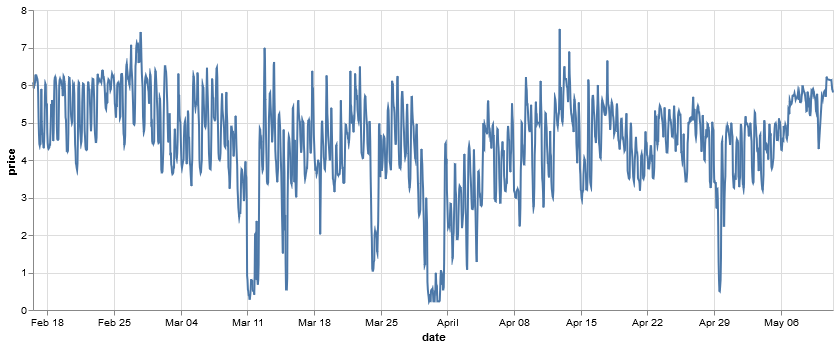

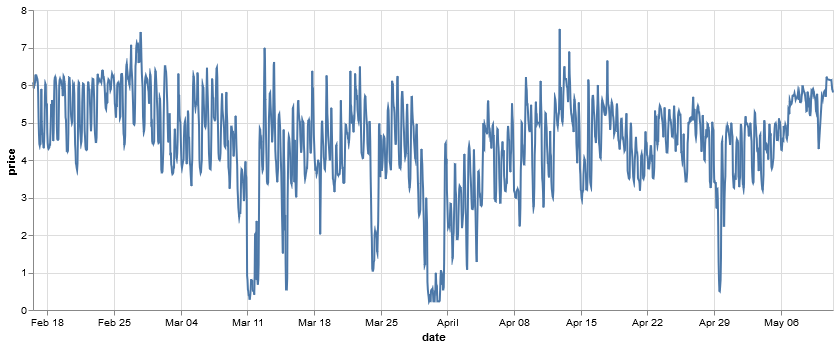

In [26]:
#RealData plot
alt.Chart(realdata).mark_line().encode(
    x="date:T",
    y="price"
).properties(
   width=800
)

In [27]:
pre=preds.merge(realdata,left_on='date',right_on='date',how='inner')
pre.head()

,date,price_x,price_y
0,2018-02-16 12:00:00,5.942172,6.069
1,2018-02-16 13:00:00,5.896464,6.021
2,2018-02-16 14:00:00,5.720930,5.901
3,2018-02-16 15:00:00,5.850497,6.001
4,2018-02-16 16:00:00,6.244891,6.005


In [28]:
pre=pre.rename(columns={"price_x": "predict", "price_y": "real"})

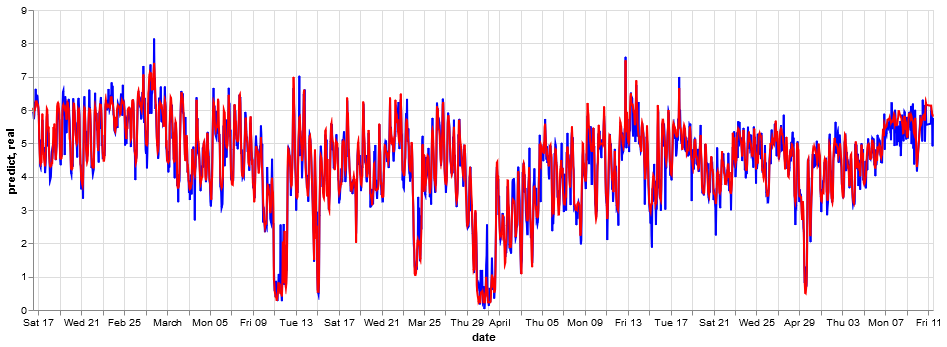

In [14]:
xrange = []
base = alt.Chart(pre.reset_index()).encode(x=alt.X('date', scale=alt.Scale(),
        type="temporal",title="date")) 

alt.layer(
    base.mark_line(color='blue').encode(y='predict'),
    base.mark_line(color='red').encode(y='real')
).properties(
   width=900
)